In [1]:
%display latex
qf = qepcad_formula
import numpy as np

# Lotka-Volterra with role reversal

In [2]:
R.<x,y> = QQ[]
us = [x,y]
k=QQ(0.8); b=QQ(0.6); c=QQ(0.3); e=QQ(0.05); f=QQ(2)
vf = vector([b*x*(QQ(1)-x) - c*x*(k-x)*y,
            -e*y*(QQ(1)+y)+f*x*(k-x)*y])
v0 = [2.0, 1.0]

In [3]:
#ode = [diff(u,t) == v for u,v in zip(us,vf)]; ode

In [3]:
vf

(3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y)

## Sample trajectory

In [4]:
ts = srange(0,50,0.5)
sol = desolve_odeint(vf, v0, ts, us,compute_jac=True)

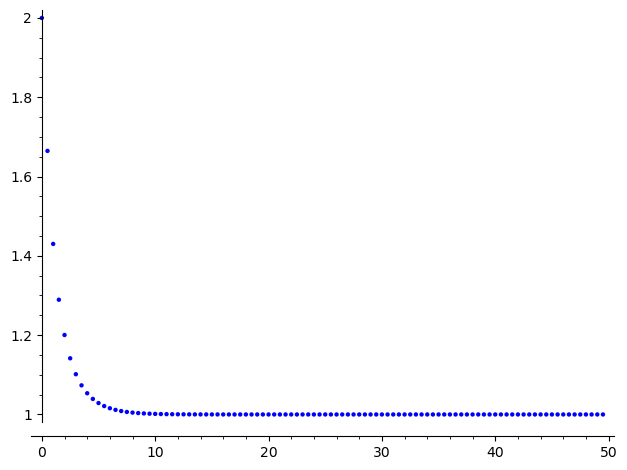

In [5]:
p = points(zip(ts,sol[:,0]))
p.show()

## Phase portrait 

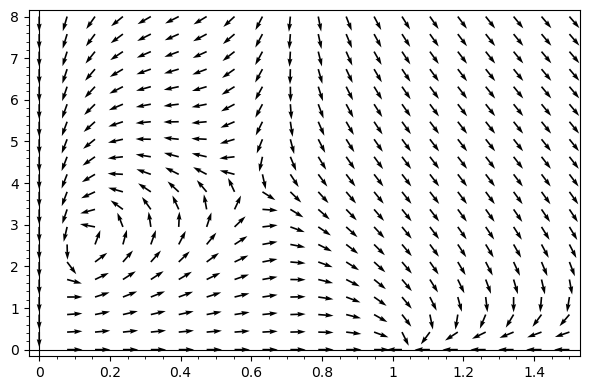

In [6]:
plot_vector_field((SR^2)(vf)/(SR^2)(vf).norm(),(x,0,1.5),(y,0,8))

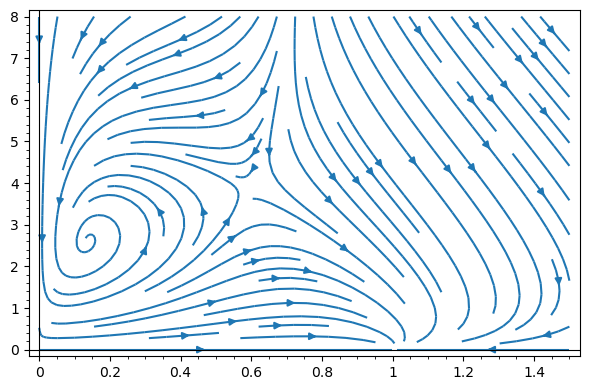

In [7]:
streamline_plot(tuple(vf),(x,0,1.5),(y,0,8))

## Nullclines

In [8]:
factsx,factsy = [[a for a,_ in v.factor() if a.variables()] for v in vf]
factsx,factsy

([x, 5*x*y - 10*x - 4*y + 10], [y, 40*x^2 - 32*x + y + 1])

In [9]:
equillib = [(d[SR(x)], d[SR(y)]) for d in
            solve([SR(v) == 0 for v in vf],list(map(SR,us)),solution_dict=True)
            if d[SR(x)] >= 0 and d[SR(y)] >= 0]
equillib

[(0, 0),
 (1, 0),
 (0.1355180875484841, 2.601972729910067),
 (0.5920959774170783, 3.923965351299326)]

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


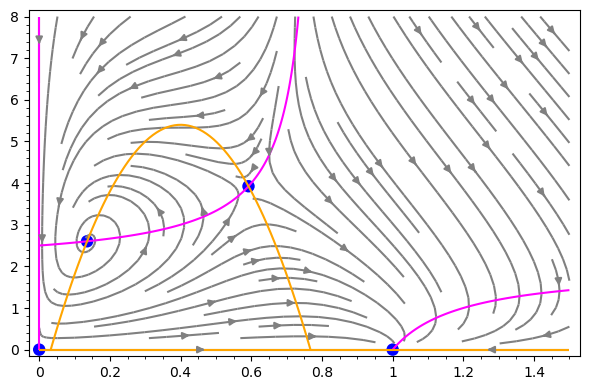

In [10]:
p = []
p.append(streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey"))
p.append(implicit_plot(factsx[0], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsx[1], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsy[0], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
p.append(implicit_plot(factsy[1], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
p.append(points(equillib,color="blue",size=80))
sum(p)

## Lie derivative computation

In [11]:
def lie(f,p,n=1):
    if n == 0:
        return p
    elif n > 0:
        return lie(f, vector(p.gradient()[-len(f):])*f, n - 1)
    else:
        raise Exception()

### Plot of Lie derivatives

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


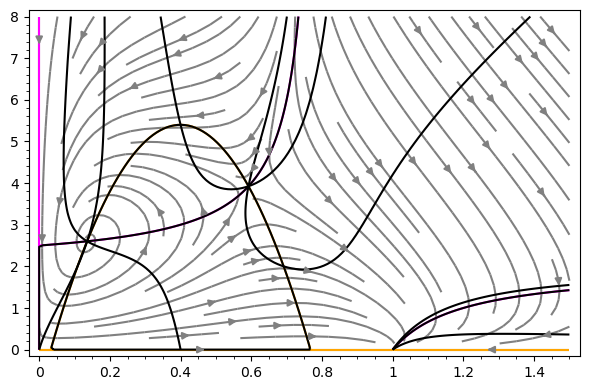

In [12]:
p = []
p.append(streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey"))
p.append(implicit_plot(factsx[0], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsx[1], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsy[0], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
p.append(implicit_plot(factsy[1], (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
for g in factsx + factsy:
    c = SR(lie(vf,g)) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color="black"))
sum(p)

### Plot of higher Lie derivatives

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


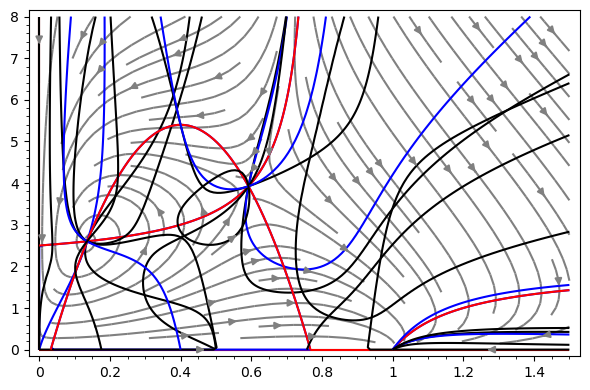

In [13]:
p = []
p.append(streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey"))
for g in factsx + factsy:
    for n in range(3):
        c = SR(lie(vf,g,n)) == 0
        col = ["red","blue","black"][n]
        p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                               aspect_ratio='automatic',color=col))
sum(p)

## $\mathrm{DRI}$ decision procedure

In [14]:
def dri(f,p,N):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = []
    for n in range(0,N+1):
        d = lie(f,d) if n > 0 else p
        if d in R.ideal(L):
            return n
        L.append(d)
    return False

In [15]:
from subprocess import call
from contextlib import contextmanager

TimeoutError = KeyboardInterrupt

@contextmanager
def timeout(seconds=1, g = None):
    try:
        alarm(seconds)
        yield
        cancel_alarm()
    except TimeoutError:
        if g is None:
            raise
        else:
            g()

In [16]:
from sage.interfaces.quit import expect_quitall, kill_spawned_jobs

def qcad(F, tout=10):
    try:
        with timeout(tout):
            q = qepcad(F, interact=True)
            q.go()
            q.go()
            q.go()
            fin = q.finish()
            #ans.close()
            ans = q.answer()
       #     print type(fin)
       #     print type(ans)
            return str(ans)
    finally:
        #q._qex.quit()
        q.quit()
        q._qex.quit()
        kill_spawned_jobs(verbose=False)
        expect_quitall(verbose=True)

In [17]:
def dri2(f,ps,N,verbose=True):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = []
    xs = ps[0].parent().gens()
    for n in range(0,N+1):
        ds = [lie(f,d) for d in ds] if n > 0 else ps
        ips = sum(L, [])
        I = R.ideal(ips)
        if verbose:
            print("L[{}] = {}".format(n,ds))
            print("I = <{}>".format(ips))
        if all(d in I for d in ds):
            if verbose:
                print("Lie derivatives in ideal for n = {}".format(n))
            F = qf.forall(xs,
                  qf.implies(qf.and_(*(SR(p) == 0 for p in ps)),
                             qf.and_(*(SR(i) == 0 for i in ips))))
            if qcad(F) == "TRUE":
                 return n
        L.append(ds)
    return False

### Prove $x = 0$ and $y=0$ are invariants

In [18]:
dri(vf, x, 3)

1

In [19]:
dri(vf, y, 3)

1

### Prove the intersection of the nullclines is an invariant

In [21]:
for n in range(10000):
    dri2(vf, [vf[0], vf[1]], 3)

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
I = <[]>
L[1] = [-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]
I = <[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]>
Lie derivatives in ideal for n = 1
L[0] = [3/10*x^2*y - 3/5*x

UnboundLocalError: local variable 'q' referenced before assignment

## Liu, Zhan, & Zhao decision procedure procedure for semi-algebraic sets

In [20]:
def saturating_ideal(f,p):
    print("===")
    N = 0
    L = []
    while True:
        # Loop guaranteed to terminate by the Hilbert basis theorem
        l = lie(f, L[-1]) if N > 0 else p
        N += 1
        I = R.ideal(L)
        print("I     = <{}>".format(', '.join(map(str, L))))
        print("basis = <{}>".format(', '.join(map(str, I.groebner_basis()))))
        print("L[{}]  = {}".format(N, l))
        if l in I:
            print("===")
            return L
        L.append(l)
        print("---")

In [21]:
def or_(ys):
    xs = list(ys)
    return xs[0] if len(xs) == 1 else qf.or_(*xs)
def and_(ys):
    xs = list(ys)
    return xs[0] if len(xs) == 1 else qf.and_(*xs)

In [22]:
def in_lt(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) < 0])
                  for n in range(len(ips)))
def in_lte(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        [and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) < 0])
            for n in range(len(ips)-1)]
        +
        [and_([SR(d) == 0 for d in ips[0:-1]] + [SR(ips[-1]) <= 0])])
def in_gt(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) > 0])
                  for n in range(len(ips)))
def in_gte(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        [and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) > 0])
            for n in range(len(ips)-1)]
        +
        [and_([SR(d) == 0 for d in ips[0:-1]] + [SR(ips[-1]) >= 0])])

In [23]:
def in_cnf(f,cnf):
    # cnf is a disjunction of conjunctions of inequalities,
    # represented as a list of lists of tuples (s,p)
    # where s is "LT" or "LEQ" and p is a scalar field
    return or_(
        and_(
            in_lt(f,p) if s == "LT" else
            in_lte(f,p) if s == "LEQ" else 
            in_gt(f,p) if s == "GT" else
            in_gte(f,p)
            for (s,p) in conjunct
        ) for conjunct in cnf
    )

In [24]:
def from_cnf(cnf):
    # cnf is a disjunction of conjunctions of inequalities,
    # represented as a list of lists of tuples (s,p)
    # where s is "LT" or "LEQ" and p is a scalar field
    return or_(
        and_(
            SR(p) < 0 if s == "LT" else
            SR(p) <= 0 if s == "LEQ" else 
            SR(p) > 0 if s == "GT" else
            SR(p) >= 0 if s == 'GEQ' else
            SR(p) == 0
            for (s,p) in conjunct
        ) for conjunct in cnf
    )

In [25]:
def lzz(f,h,p,s=[],xys=None,debug=False):
    if xys is None:
        xys = f[0].parent().gens()[-len(f):]
    print("xys =", xys)
    H = [] if h == [] else [from_cnf(h)]
    IHp = [] if h == [] else [in_cnf(f, h)]
    IHm = [] if h == [] else [in_cnf(-f, h)]
    P = from_cnf(p)
    F = qf.forall(xys, and_(
        ([qf.implies(from_cnf(s), P)] if s else [])
        +
        [qf.implies(and_([P] + H + IHp),
                    in_cnf(f,p)),
         qf.implies(and_([qf.not_(P)] + H + IHm),
                   qf.not_(in_cnf(-f,p)))]
    ))
    print(F)
    qcd = qcad(F)
    if debug:
        return F, qcd
    return (True if qcd == "TRUE" else
            False if qcd == "FALSE" else
            qcd)

In [26]:
import re
def to_mathematica(xys,s):
    s1 = re.sub(r"\(A [a-zA-Z]+\)*", "", s)[1:-1]
    s2 = s1.replace("/\\", "&&").replace("\\/", "||").replace("[","(").replace("]", ")").replace("~", "!").replace(" = ", " == ").replace("==>", "\\[Implies]") 
    return "ForAll[{" + ",".join(map(str, xys)) +  "}, " + s2 + "]"

In [27]:
def lzz_mathematica(f,h,p,s=[],xys=None,debug=False):
    if xys is None:
        xys = f[0].parent().gens()[-len(f):]
    print("xys =", xys)
    H = [] if h == [] else [from_cnf(h)]
    IHp = [] if h == [] else [in_cnf(f, h)]
    IHm = [] if h == [] else [in_cnf(-f, h)]
    P = from_cnf(p)
    F = qf.forall(xys, and_(
        ([qf.implies(from_cnf(s), P)] if s else [])
        +
        [qf.implies(and_([P] + H + IHp),
                    in_cnf(f,p)),
         qf.implies(and_([qf.not_(P)] + H + IHm),
                   qf.not_(in_cnf(-f,p)))]
    ))
    return to_mathematica(xys, str(F))

### Prove $x \geq 1$ is invariant

In [33]:
lzz(vf,[[('GEQ',x),('GEQ',y)]], [[('GEQ', x - 1)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x - 1
---
I     = <x - 1>
basis = <x - 1>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
---
I     = <x - 1, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x>
basis = <x - 1, y>
L[3]  = -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x
===
===
I     = <>
basis = <0>
L[1]  = x - 1
---
I     = <x - 1>
basis = <x - 1>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
---
I     = <x - 1, -3/10*x^2*y + 3/5*x^2

UnboundLocalError: local variable 'q' referenced before assignment

### Prove that $x \geq 0, y \geq 0$ is invariant

In [ ]:
lzz(vf,[], [[('GEQ', x), ('GEQ', y)]])

### Proving invariance of regions

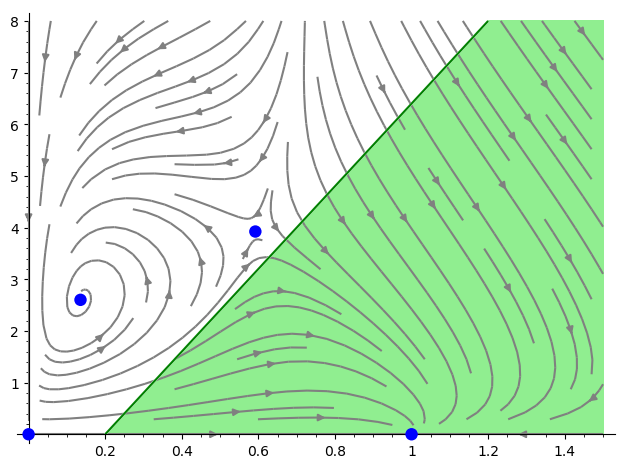

In [30]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([SR(x) >= (1/8)*SR(y)+0.2], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [31]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('LEQ', (1/8)*y+QQ(1/5) - x)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = -x + 1/8*y + 1/5
---
I     = <-x + 1/8*y + 1/5>
basis = <x - 1/8*y - 1/5>
L[2]  = -11/20*x^2*y + 3/5*x^2 + 11/25*x*y - 1/160*y^2 - 3/5*x - 1/160*y
---
I     = <-x + 1/8*y + 1/5, -11/20*x^2*y + 3/5*x^2 + 11/25*x*y - 1/160*y^2 - 3/5*x - 1/160*y>
basis = <y^3 - 196/55*y^2 - 472/275*y + 3072/275, x - 1/8*y - 1/5>
L[3]  = 11/10*x^4*y - 33/100*x^3*y^2 - 37/50*x^3*y + 897/2000*x^2*y^2 - 18/25*x^3 - 81/125*x^2*y - 369/2500*x*y^2 + 1/1600*y^3 + 27/25*x^2 + 47/125*x*y + 3/3200*y^2 - 9/25*x +

True

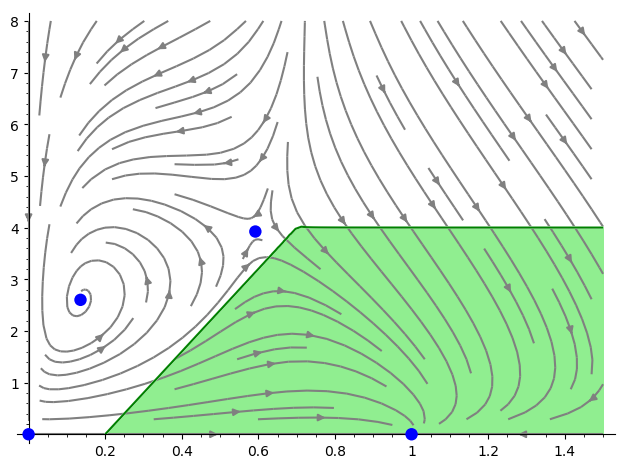

In [32]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([SR(y) <= 4, SR(x) >= (1/8)*SR(y)+0.2], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [33]:
lzz(vf,[[('GEQ', x), ('GEQ', y)]], [[('LEQ', y - QQ(4)), ('LEQ', QQ(1/8)*y + QQ(1/5) - x)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = y - 4
---
I     = <y - 4>
basis = <y - 4>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
---
I     = <y - 4, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y>
basis = <x^2 - 4/5*x + 1/8, y - 4>
L[3]  = 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y
---
I     = <y - 4, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/40

True

### Should be false

In [34]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([SR(y) <= QQ(4), SR(x) >= (1/8)*SR(y)+0.1], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [35]:
lzz(vf,[[('GEQ', x), ('GEQ', y)]], [[('LEQ', y - 4), ('LEQ', QQ(1/8)*y + QQ(1/10) - x)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = y - 4
---
I     = <y - 4>
basis = <y - 4>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
---
I     = <y - 4, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y>
basis = <x^2 - 4/5*x + 1/8, y - 4>
L[3]  = 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y
---
I     = <y - 4, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y, 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/40

False

### Ellipsoid region

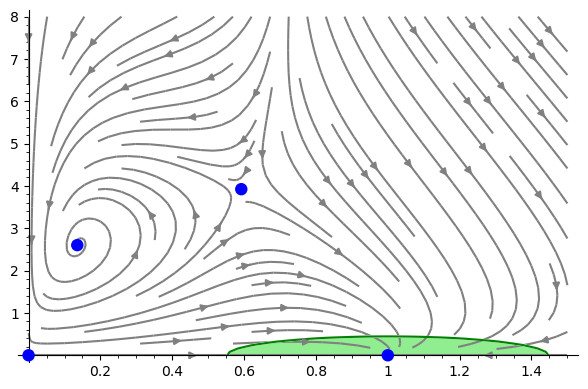

In [31]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([0.2 >= (SR(x) - 1)**2 + SR(y)**2], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [32]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GT', QQ(0.2) - (x - 1)**2 - y**2)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = -x^2 - y^2 + 2*x - 4/5
---
I     = <-x^2 - y^2 + 2*x - 4/5>
basis = <x^2 + y^2 - 2*x + 4/5>
L[2]  = -3/5*x^3*y + 4*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 16/5*x*y^2 + 1/10*y^3 - 12/5*x^2 - 12/25*x*y + 1/10*y^2 + 6/5*x
---
I     = <-x^2 - y^2 + 2*x - 4/5, -3/5*x^3*y + 4*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 16/5*x*y^2 + 1/10*y^3 - 12/5*x^2 - 12/25*x*y + 1/10*y^2 + 6/5*x>
basis = <y^5 - 2510/409*y^4 + 22503/4090*x*y^2 + 45341/40900*y^3 - 4269/10225*x*y - 38657/8180*y^2 + 3633/10225*x + 7266/5

True

In [34]:
lzz(vf, [], [[('GT', QQ(0.2) - (x - 1)**2 - y**2)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = -x^2 - y^2 + 2*x - 4/5
---
I     = <-x^2 - y^2 + 2*x - 4/5>
basis = <x^2 + y^2 - 2*x + 4/5>
L[2]  = -3/5*x^3*y + 4*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 16/5*x*y^2 + 1/10*y^3 - 12/5*x^2 - 12/25*x*y + 1/10*y^2 + 6/5*x
---
I     = <-x^2 - y^2 + 2*x - 4/5, -3/5*x^3*y + 4*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 16/5*x*y^2 + 1/10*y^3 - 12/5*x^2 - 12/25*x*y + 1/10*y^2 + 6/5*x>
basis = <y^5 - 2510/409*y^4 + 22503/4090*x*y^2 + 45341/40900*y^3 - 4269/10225*x*y - 38657/8180*y^2 + 3633/10225*x + 7266/51125*y + 72/10225, x*y^3 - 20/3*y^4 + 6*x*y^2 + 11/30*y^3 - 2/5*x*y - 31/6*y^2 + 2/5*x + 4/25*y, x^2 + y^2 - 2*x + 4/5>
L[3]  = 6/5*x^5*y - 827/50*x^4*y^2 + 12/5*x^3*y^3 - 24/25*x^4*y + 2191/100*x^3*y^2 - 97/25*x^2*y^3 - 54/25*x^4 - 981/500*x^3*y - 12591/2500*x^2*y^2 + 196/125*x*y^3 - 3/200*y^4 + 126/25*x^3 + 1137/500*x^2*y - 713/625*x*y^2 - 1/40*y^3 - 18/5*x^2 - 69/125*x*y - 1/100*y^2 + 18/25*x
---
I     = <-x^2 - y^2 + 2*x - 4/5, -3/5*x^3*y + 4*x^2*y^2 + 6/5*x

True

### Half plane

In [38]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([SR(x) >= 0.2], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [39]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', x - QQ(0.2))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x - 1/5
---
I     = <x - 1/5>
basis = <x - 1/5>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
---
I     = <x - 1/5, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x>
basis = <x - 1/5, y - 8/3>
L[3]  = -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x
---
I     = <x - 1/5, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/

False

### Oversized ellipsoid region

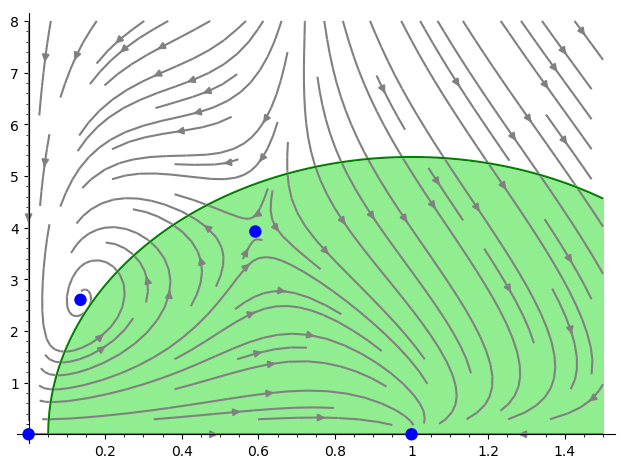

In [40]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([0.9 >= (SR(x) - 1)**2 + QQ(1/32)*SR(y)**2], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [41]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', QQ(0.9) - (x - QQ(1))**2 - QQ(1/32)*y**2)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = -x^2 - 1/32*y^2 + 2*x - 1/10
---
I     = <-x^2 - 1/32*y^2 + 2*x - 1/10>
basis = <x^2 + 1/32*y^2 - 2*x + 1/10>
L[2]  = -3/5*x^3*y + 1/8*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 1/10*x*y^2 + 1/320*y^3 - 12/5*x^2 - 12/25*x*y + 1/320*y^2 + 6/5*x
---
I     = <-x^2 - 1/32*y^2 + 2*x - 1/10, -3/5*x^3*y + 1/8*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 1/10*x*y^2 + 1/320*y^3 - 12/5*x^2 - 12/25*x*y + 1/320*y^2 + 6/5*x>
basis = <y^5 - 370/43*y^4 + 50496/215*x*y^2 + 6196/1075*y^3 - 1001472/1075*x*y + 264/43*y^

False

## Finding algebraic invariants via template

In [42]:
R.<u1,u2,u3,u4,u5,u6,x,y> = QQ[]; R

Multivariate Polynomial Ring in u1, u2, u3, u4, u5, u6, x, y over Rational Field

In [43]:
p = u1 + u2*x + u3*y; p

u2*x + u3*y + u1

In [44]:
vff = vector([R(v) for v in vf]); vff

(3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y)

In [45]:
r = lie(vff,p).reduce(ideal(p)); r

-2*u3*x^2*y - 3/10*u3*x*y^2 - 3/10*u1*x*y + 11/5*u3*x*y + 19/100*u3*y^2 + 3/5*u1*x + 6/25*u1*y - 13/20*u3*y - 3/5*u1

In [46]:
F = qf.forall([x,y], qf.implies(qf.and_(SR(x) >= 0, SR(y) >= 0), SR(r) == 0)); F

(A x)(A y)[[x >= 0 /\ y >= 0] ==> -2 u3 x^2 y - 3/10 u3 x y^2 - 3/10 u1 x y + 11/5 u3 x y + 19/100 u3 y^2 + 3/5 u1 x + 6/25 u1 y - 13/20 u3 y - 3/5 u1 = 0]

In [47]:
qepcad(F)

u1 = 0 /\ u3 = 0

So, $0 = \alpha x$ is an invariant 

In [48]:
p = u1 + u2*x**2 + u3*y**2; p

u2*x^2 + u3*y^2 + u1

In [49]:
r = lie(vff,p).reduce(ideal(p)); r

-4*u3*x^2*y^2 - 3/5*u3*x*y^3 + 22/5*u3*x*y^2 + 19/50*u3*y^3 - 3/5*u1*x*y - 13/10*u3*y^2 + 6/5*u1*x + 12/25*u1*y - 6/5*u1

In [50]:
F = qf.forall([x,y], qf.implies(qf.and_(SR(x) >= 0, SR(y) >= 0), SR(r) == 0)); F

(A x)(A y)[[x >= 0 /\ y >= 0] ==> -4 u3 x^2 y^2 - 3/5 u3 x y^3 + 22/5 u3 x y^2 + 19/50 u3 y^3 - 3/5 u1 x y - 13/10 u3 y^2 + 6/5 u1 x + 12/25 u1 y - 6/5 u1 = 0]

In [51]:
qepcad(F)

u1 = 0 /\ u3 = 0

So, $0 = \alpha x^2$ is an invariant

Attempt to find additional invariants in restricted region:

In [52]:
F = qf.forall([x,y], qf.implies(qf.and_(SR(x) >= 0, SR(y) >= 0, (1/8)*SR(y) + QQ(1/5) - SR(x) <= 0, SR(y) <= 4), SR(r) == 0)); F

(A x)(A y)[[x >= 0 /\ y >= 0 /\ -x + 1/8 y + 1/5 <= 0 /\ y <= 4] ==> -4 u3 x^2 y^2 - 3/5 u3 x y^3 + 22/5 u3 x y^2 + 19/50 u3 y^3 - 3/5 u1 x y - 13/10 u3 y^2 + 6/5 u1 x + 12/25 u1 y - 6/5 u1 = 0]

In [74]:
def h():
    print "timeout!"

In [78]:
with timeout(1, h):
    q = qepcad(F)
q

Interrupting Qepcad...
timeout!


u1 = 0 /\ u3 = 0

Better to solve for coefficients using builtin solver

In [54]:
S = QQ['u1,u2,u3,u4,u5,u6']['x,y']; S

Multivariate Polynomial Ring in x, y over Multivariate Polynomial Ring in u1, u2, u3, u4, u5, u6 over Rational Field

In [55]:
coeffs = S(r).coefficients(); coeffs

[-4*u3,
 -3/5*u3,
 22/5*u3,
 19/50*u3,
 -3/5*u1,
 -13/10*u3,
 6/5*u1,
 12/25*u1,
 -6/5*u1]

In [56]:
solve(map(SR, coeffs), map(SR, [u1,u2,u3,u4,u5,u6]))

[[u1 == 0, u2 == r4, u3 == 0, u4 == r3, u5 == r2, u6 == r1]]

### Full template

In [57]:
S.<u1,u2,u3,u4,u5,u6,x,y> = QQ[]; S

Multivariate Polynomial Ring in u1, u2, u3, u4, u5, u6, x, y over Rational Field

In [58]:
vff = vector([S(v) for v in vf]); vff

(3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y)

In [59]:
p = u1 + u2*x + u3*y + u4*x*y + u5*x**2 + u6*y**2; p

u5*x^2 + u4*x*y + u6*y^2 + u2*x + u3*y + u1

In [60]:
vff[0]

3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x

In [61]:
r = lie(vff, p) % p; r

4*u5*x^4 + 2*u4*x^3*y + 3/5*u5*x^3*y + 3/10*u4*x^2*y^2 + 4*u2*x^3 - 22/5*u5*x^3 + 3/10*u2*x^2*y + 2*u3*x^2*y - 11/5*u4*x^2*y - 19/50*u5*x^2*y - 19/100*u4*x*y^2 + 4*u1*x^2 - 19/5*u2*x^2 + 13/10*u5*x^2 - 7/50*u2*x*y - 8/5*u3*x*y + 13/20*u4*x*y + 1/20*u3*y^2 - 16/5*u1*x + 7/10*u2*x + 1/10*u1*y + 1/20*u3*y + 1/10*u1

In [62]:
F = qf.forall([x,y], SR(r) == 0); F

(A x)(A y)[4 u5 x^4 + 2 u4 x^3 y + 3/5 u5 x^3 y + 3/10 u4 x^2 y^2 + 4 u2 x^3 - 22/5 u5 x^3 + 3/10 u2 x^2 y + 2 u3 x^2 y - 11/5 u4 x^2 y - 19/50 u5 x^2 y - 19/100 u4 x y^2 + 4 u1 x^2 - 19/5 u2 x^2 + 13/10 u5 x^2 - 7/50 u2 x y - 8/5 u3 x y + 13/20 u4 x y + 1/20 u3 y^2 - 16/5 u1 x + 7/10 u2 x + 1/10 u1 y + 1/20 u3 y + 1/10 u1 = 0]

In [63]:
# qepcad(F) # too slow!

Better to solve for coefficients using builtin solver

In [64]:
S = QQ['u1,u2,u3,u4,u5,u6']['x,y']; S

Multivariate Polynomial Ring in x, y over Multivariate Polynomial Ring in u1, u2, u3, u4, u5, u6 over Rational Field

In [65]:
coeffs = S(r).coefficients(); coeffs

[4*u5,
 2*u4 + 3/5*u5,
 3/10*u4,
 4*u2 - 22/5*u5,
 3/10*u2 + 2*u3 - 11/5*u4 - 19/50*u5,
 -19/100*u4,
 4*u1 - 19/5*u2 + 13/10*u5,
 -7/50*u2 - 8/5*u3 + 13/20*u4,
 1/20*u3,
 -16/5*u1 + 7/10*u2,
 1/10*u1 + 1/20*u3,
 1/10*u1]

In [66]:
solve(map(SR, coeffs), map(SR, [u1,u2,u3,u4,u5,u6]))

[[u1 == 0, u2 == 0, u3 == 0, u4 == 0, u5 == 0, u6 == r5]]

### Search using general template

In [67]:
n = 2

In [68]:
us = ['u{}{}'.format(i,j) for i in range(n) for j in range(n)]; us

['u00', 'u01', 'u10', 'u11']

In [69]:
R = PolynomialRing(QQ, ','.join(us + ['x','y']), order='degrevlex'); R

Multivariate Polynomial Ring in u00, u01, u10, u11, x, y over Rational Field

In [70]:
S = QQ[','.join(us)]['x','y']; S

Multivariate Polynomial Ring in x, y over Multivariate Polynomial Ring in u00, u01, u10, u11 over Rational Field

In [71]:
uus = R.gens()[:-2]; uus

(u00, u01, u10, u11)

In [72]:
x,y = R.gens()[-2:]

In [73]:
vs = [R(x^i*y^j) for i in range(n) for j in range(n)]; vs

[1, y, x, x*y]

In [74]:
vff = vector([R(v) for v in vf]); vff

(3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y)

In [75]:
templ = sum(u * v for u, v in zip(uus,vs)); templ

u11*x*y + u10*x + u01*y + u00

In [76]:
r = lie(vff, templ) % templ; r

2*u10*x^3 - 3/10*u01*x*y^2 + 2*u00*x^2 - 8/5*u10*x^2 - 3/10*u00*x*y + 3/5*u01*x*y + 1/20*u10*x*y + 6/25*u01*y^2 - u00*x + 1/20*u10*x + 29/100*u00*y - 3/5*u01*y - 11/20*u00

In [77]:
#r = lie(vff, templ).reduce(ideal([templ])); r

In [78]:
coeffs = S(r).coefficients(); coeffs

[2*u10,
 -3/10*u01,
 2*u00 - 8/5*u10,
 -3/10*u00 + 3/5*u01 + 1/20*u10,
 6/25*u01,
 -u00 + 1/20*u10,
 29/100*u00 - 3/5*u01,
 -11/20*u00]

In [79]:
sln = solve(map(SR, coeffs), map(SR, uus)); sln

[[u00 == 0, u01 == 0, u10 == 0, u11 == r6]]

In [80]:
zs = [eq.lhs() for eq in sln[0] if eq.rhs() == 0]; zs

[u00, u01, u10]

In [81]:
templ.subs(**{str(z):0 for z in zs})

u11*x*y

So apparently $x^ny^n = 0$ is an invariant

In [82]:
g = Graphics()
g += streamline_plot(map(SR, tuple(vf)), (x,0,1.5), (y,0,8),
                     color="grey")
g += implicit_plot(SR(x^3*y^3) == 0,
                   (x,0,1.5), (y,0,8), color="blue")
#g += points((4,2), size=100, color="red", zorder=10)
g.show(aspect_ratio='automatic')

So: bad example, we cannot find any invariant curves apart from the axes!

## Formula parameter synthesis

We first try to synthesis the range of parameters $m$ such that $x \geq \frac{1}{32} y + m$ is a continuous invariant.

In [83]:
R.<m,x,y> = QQ[]; R

Multivariate Polynomial Ring in m, x, y over Rational Field

In [84]:
m = R.gens_dict()['m']; m

m

### Elliptical region

In [85]:
s = m - (x - 1)**2 - QQ(1/32)*y**2; s

-x^2 - 1/32*y^2 + m + 2*x - 1

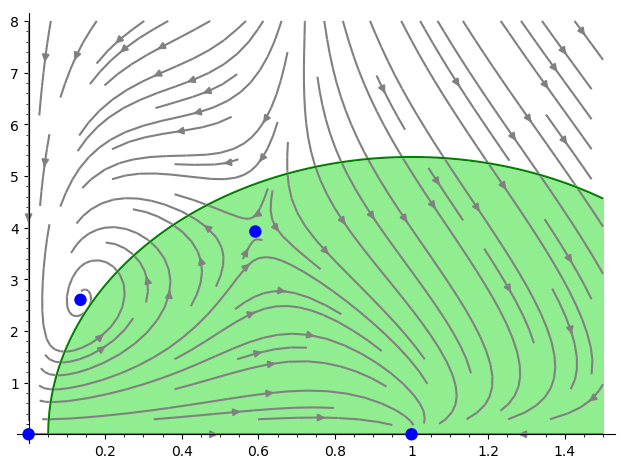

In [86]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([0 <= SR(s.subs(m=0.9))], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [87]:
vvf = vector(map(SR, vf)); vvf

(3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y)

Should be false

In [88]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', s.subs(m=QQ(0.9)))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = -x^2 - 1/32*y^2 + 2*x - 1/10
---
I     = <-x^2 - 1/32*y^2 + 2*x - 1/10>
basis = <x^2 + 1/32*y^2 - 2*x + 1/10>
L[2]  = -3/5*x^3*y + 1/8*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 1/10*x*y^2 + 1/320*y^3 - 12/5*x^2 - 12/25*x*y + 1/320*y^2 + 6/5*x
---
I     = <-x^2 - 1/32*y^2 + 2*x - 1/10, -3/5*x^3*y + 1/8*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 1/10*x*y^2 + 1/320*y^3 - 12/5*x^2 - 12/25*x*y + 1/320*y^2 + 6/5*x>
basis = <y^5 - 370/43*y^4 + 50496/215*x*y^2 + 6196/1075*y^3 - 1001472/1075*x*y + 264/43*y^

False

Attempt parameter synthesis -- too slow

In [89]:
# lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', s)]])

In [90]:
print lzz_mathematica(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', s)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = -x^2 - 1/32*y^2 + m + 2*x - 1
---
I     = <-x^2 - 1/32*y^2 + m + 2*x - 1>
basis = <x^2 + 1/32*y^2 - m - 2*x + 1>
L[2]  = -3/5*x^3*y + 1/8*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 1/10*x*y^2 + 1/320*y^3 - 12/5*x^2 - 12/25*x*y + 1/320*y^2 + 6/5*x
---
I     = <-x^2 - 1/32*y^2 + m + 2*x - 1, -3/5*x^3*y + 1/8*x^2*y^2 + 6/5*x^3 + 27/25*x^2*y - 1/10*x*y^2 + 1/320*y^3 - 12/5*x^2 - 12/25*x*y + 1/320*y^2 + 6/5*x>
basis = <y^5 - 1952/43*m*y^3 - 370/43*y^4 + 18432/43*m^2*y - 33792/43*m*x*y + 12352/43

Too slow for mathematica also!

### Half-plane

In [91]:
s = x - m; s

-m + x

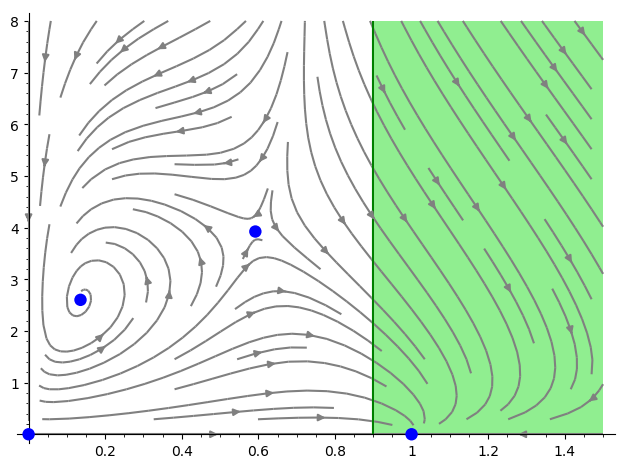

In [92]:
g = Graphics()
g += streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey")
g += region_plot([0 <= SR(s.subs(m=0.9))], (x,0,1.5),(y,0,8),
                 incol="lightgreen", bordercol="green")
g += points(equillib,color="blue",size=80,zorder=100)
g.show(aspect_ratio="automatic")

In [93]:
vvf = vector(map(SR, vf)); vvf

(3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y)

Should be true

In [94]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', s.subs(m=QQ(0.9)))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x - 9/10
---
I     = <x - 9/10>
basis = <x - 9/10>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
---
I     = <x - 9/10, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x>
basis = <x - 9/10, y + 2>
L[3]  = -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x
---
I     = <x - 9/10, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y +

True

Should be false

In [95]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', s.subs(m=QQ(0.1)))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x - 1/10
---
I     = <x - 1/10>
basis = <x - 1/10>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
---
I     = <x - 1/10, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x>
basis = <x - 1/10, y - 18/7>
L[3]  = -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x
---
I     = <x - 1/10, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*

False

Attempt parameter synthesis -- it works!

In [96]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', s)]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*x^2*y + 3/5*x^2 + 6/25*x*y - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*x^2*y - 8/5*x*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = -m + x
---
I     = <-m + x>
basis = <m - x>
L[2]  = 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x
---
I     = <-m + x, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x>
basis = <x^2*y - 2*x^2 - 4/5*x*y + 2*x, m - x>
L[3]  = -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x
---
I     = <-m + x, 3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/10

m - 1 <= 0 /\ [ 5 m - 4 >= 0 \/ m <= 0 ]

## Model parameter synthesis

In [97]:
try: del k
except: pass

In [98]:
R.<k, x,y> = QQ[]
us = [x,y]
b=QQ(0.6); c=QQ(0.3); e=QQ(0.05); f=QQ(2)
vf = vector([b*x*(QQ(1)-x) - c*x*(k-x)*y,
            -e*y*(QQ(1)+y)+f*x*(k-x)*y])
v0 = [2.0, 1.0]

In [99]:
tuple(map(SR,vf.subs(k=1/3)))

(3/10*x^2*y - 3/5*x^2 - 1/10*x*y + 3/5*x,
 -2*x^2*y + 2/3*x*y - 1/20*y^2 - 1/20*y)

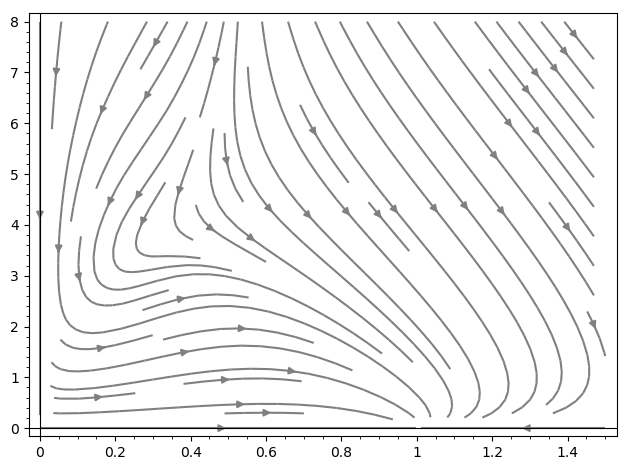

In [100]:
g = Graphics()
g += streamline_plot(tuple(map(SR,vf.subs(k=2/3))),(x,0,1.5),(y,0,8),color="grey")
#g += region_plot([0 <= SR(x - 1/3)], (x,0,1.5),(y,0,8),
#                 incol="lightgreen", bordercol="green")
g.show(aspect_ratio="automatic")

In [101]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', x - QQ(2/3))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*k*x*y - 3/10*x^2*y + 3/5*x^2 - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*k*x*y + 2*x^2*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x - 2/3
---
I     = <x - 2/3>
basis = <x - 2/3>
L[2]  = -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x
---
I     = <x - 2/3, -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x>
basis = <k*y - 2/3*y - 2/3, x - 2/3>
L[3]  = -3/5*k^2*x^2*y + 6/5*k*x^3*y - 3/5*x^4*y + 9/100*k^2*x*y^2 - 27/100*k*x^2*y^2 + 9/50*x^3*y^2 + 27/50*k*x^2*y - 18/25*x^3*y + 3/200*k*x*y^2 - 3/200*x^2*y^2 + 18/25*x^3 - 69/200*k*x*y + 21/40*x^2*y - 27/25*x^2 + 9/25*x
---
I     = <x - 2/3, -3/10*k*x*y + 3/10*x^2*y - 3/5*x^

3 k - 2 <= 0

In [102]:
print lzz_mathematica(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', x - QQ(2/3))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*k*x*y - 3/10*x^2*y + 3/5*x^2 - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*k*x*y + 2*x^2*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x - 2/3
---
I     = <x - 2/3>
basis = <x - 2/3>
L[2]  = -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x
---
I     = <x - 2/3, -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x>
basis = <k*y - 2/3*y - 2/3, x - 2/3>
L[3]  = -3/5*k^2*x^2*y + 6/5*k*x^3*y - 3/5*x^4*y + 9/100*k^2*x*y^2 - 27/100*k*x^2*y^2 + 9/50*x^3*y^2 + 27/50*k*x^2*y - 18/25*x^3*y + 3/200*k*x*y^2 - 3/200*x^2*y^2 + 18/25*x^3 - 69/200*k*x*y + 21/40*x^2*y - 27/25*x^2 + 9/25*x
---
I     = <x - 2/3, -3/10*k*x*y + 3/10*x^2*y - 3/5*x^

Mathematica gives the same answer

In [103]:
lzz(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', y-QQ(1/2))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*k*x*y - 3/10*x^2*y + 3/5*x^2 - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*k*x*y + 2*x^2*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = y - 1/2
---
I     = <y - 1/2>
basis = <y - 1/2>
L[2]  = 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y
---
I     = <y - 1/2, 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y>
basis = <k*x - x^2 - 3/80, y - 1/2>
L[3]  = 4*k^2*x^2*y - 8*k*x^3*y + 4*x^4*y - 3/5*k^2*x*y^2 + 9/5*k*x^2*y^2 - 6/5*x^3*y^2 - 6/5*k*x^2*y + 12/5*x^3*y - 3/10*k*x*y^2 + 3/10*x^2*y^2 + k*x*y - 11/5*x^2*y + 1/200*y^3 + 3/400*y^2 + 1/400*y
---
I     = <y - 1/2, 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y, 4*k^2*x^2*y - 8*k*x^3*y + 4*x^

finish  &

In [104]:
print lzz_mathematica(vf, [[('GEQ', x), ('GEQ', y)]], [[('GEQ', y-QQ(1/2))]])

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = -3/10*k*x*y + 3/10*x^2*y - 3/5*x^2 + 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = x
---
I     = <x>
basis = <x>
L[2]  = 3/10*k*x*y - 3/10*x^2*y + 3/5*x^2 - 3/5*x
===
===
I     = <>
basis = <0>
L[1]  = y
---
I     = <y>
basis = <y>
L[2]  = -2*k*x*y + 2*x^2*y + 1/20*y^2 + 1/20*y
===
===
I     = <>
basis = <0>
L[1]  = y - 1/2
---
I     = <y - 1/2>
basis = <y - 1/2>
L[2]  = 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y
---
I     = <y - 1/2, 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y>
basis = <k*x - x^2 - 3/80, y - 1/2>
L[3]  = 4*k^2*x^2*y - 8*k*x^3*y + 4*x^4*y - 3/5*k^2*x*y^2 + 9/5*k*x^2*y^2 - 6/5*x^3*y^2 - 6/5*k*x^2*y + 12/5*x^3*y - 3/10*k*x*y^2 + 3/10*x^2*y^2 + k*x*y - 11/5*x^2*y + 1/200*y^3 + 3/400*y^2 + 1/400*y
---
I     = <y - 1/2, 2*k*x*y - 2*x^2*y - 1/20*y^2 - 1/20*y, 4*k^2*x^2*y - 8*k*x^3*y + 4*x^

Mathematica's QE says false

### Parametric discrete abstraction

In [105]:
try: del k
except: pass

In [106]:
R.<k, x,y> = QQ[]
us = [x,y]
b=QQ(0.6); c=QQ(0.3); e=QQ(0.05); f=QQ(2)
vf = vector([b*x*(QQ(1)-x) - c*x*(k-x)*y,
            -e*y*(QQ(1)+y)+f*x*(k-x)*y])
v0 = [2.0, 1.0]

In [107]:
tuple(map(SR,vf.subs(k=1/3)))

(3/10*x^2*y - 3/5*x^2 - 1/10*x*y + 3/5*x,
 -2*x^2*y + 2/3*x*y - 1/20*y^2 - 1/20*y)

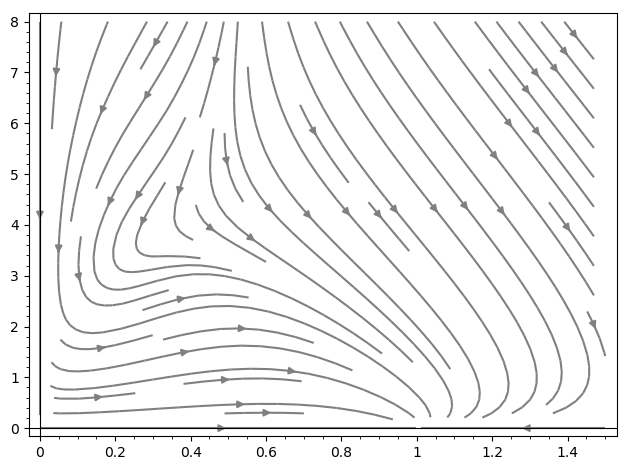

In [108]:
g = Graphics()
g += streamline_plot(tuple(map(SR,vf.subs(k=2/3))),(x,0,1.5),(y,0,8),color="grey")
#g += region_plot([0 <= SR(x - 1/3)], (x,0,1.5),(y,0,8),
#                 incol="lightgreen", bordercol="green")
g.show(aspect_ratio="automatic")

In [109]:
factsx,factsy = [[a for a,_ in v.factor() if a.variables()] for v in vf]
factsx,factsy

([x, -k*y + x*y - 2*x + 2], [y, -40*k*x + 40*x^2 + y + 1])

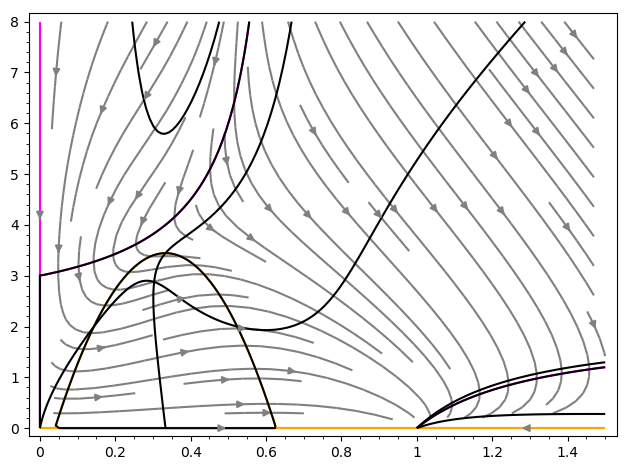

In [110]:
p = []
k0 = 2/3
p.append(streamline_plot(tuple(map(SR,vf.subs(k=k0))),
                         (x,0,1.5), (y,0,8), color="grey"))
p.append(implicit_plot(SR(factsx[0].subs(k=k0)), (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(SR(factsx[1].subs(k=k0)), (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(SR(factsy[0].subs(k=k0)), (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
p.append(implicit_plot(SR(factsy[1].subs(k=k0)), (x,0,1.5), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
for g in factsx + factsy:
    c = SR(lie(vf,g).subs(k=k0)) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color="black"))
sum(p)

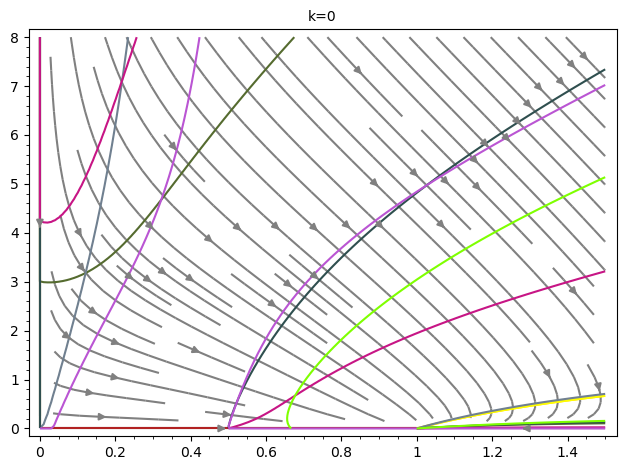

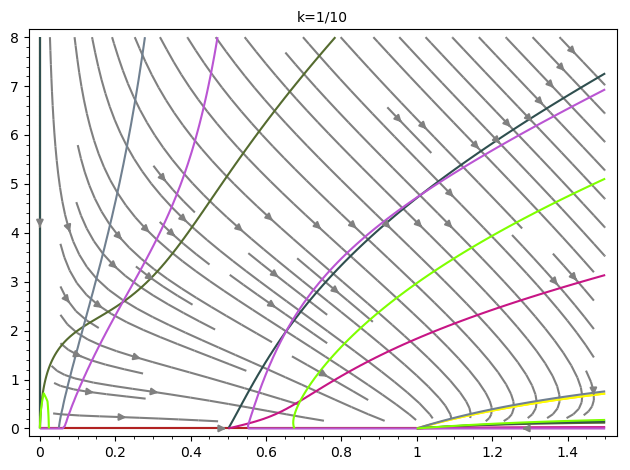

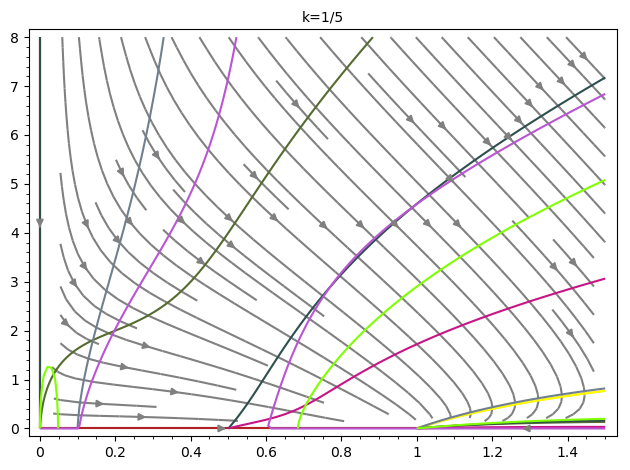

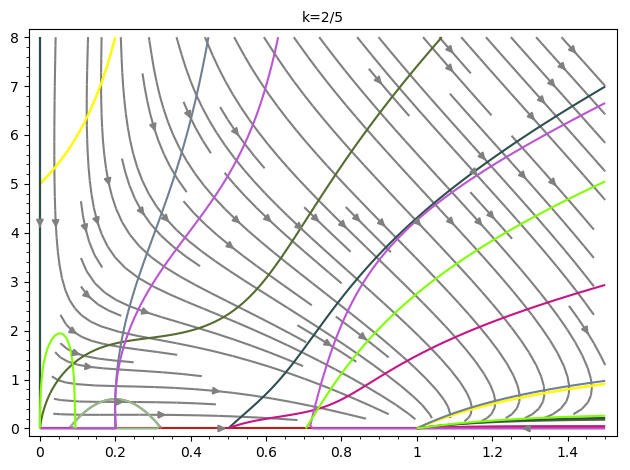

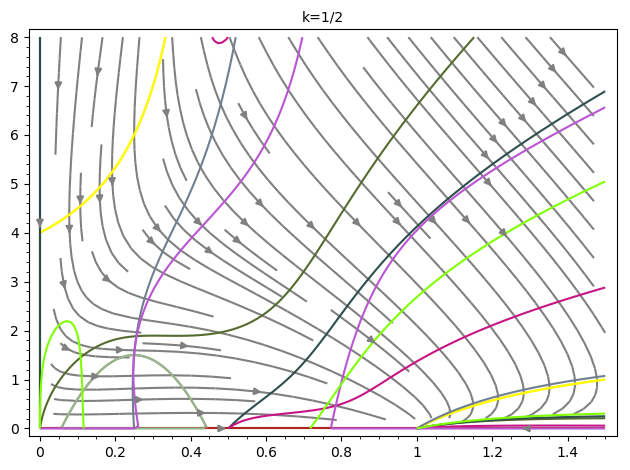

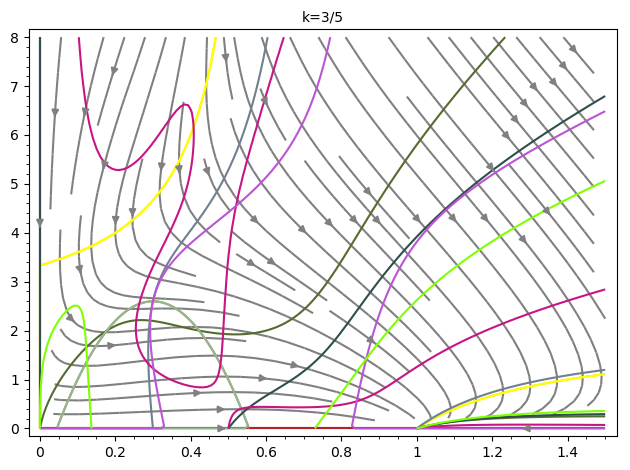

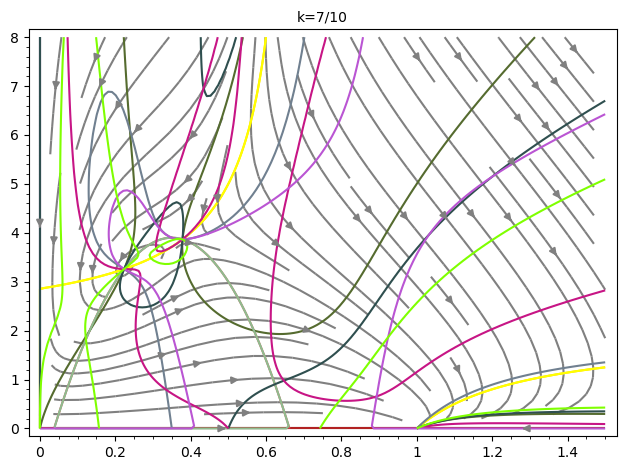

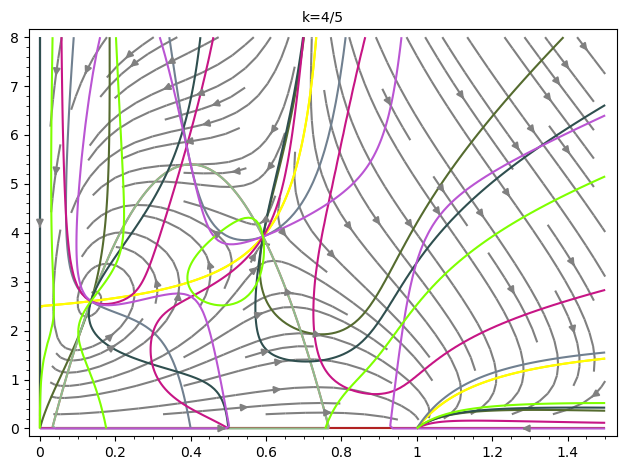

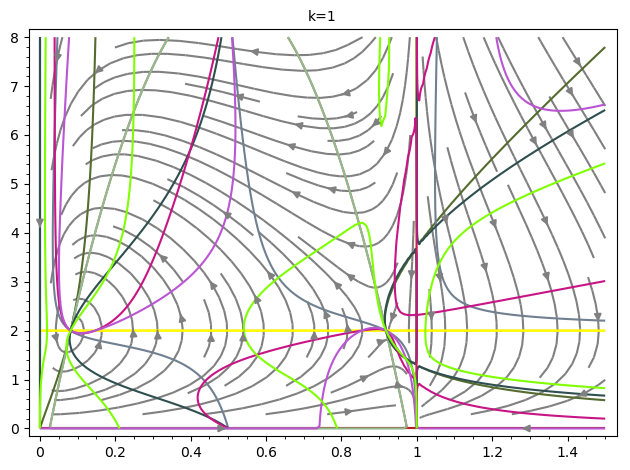

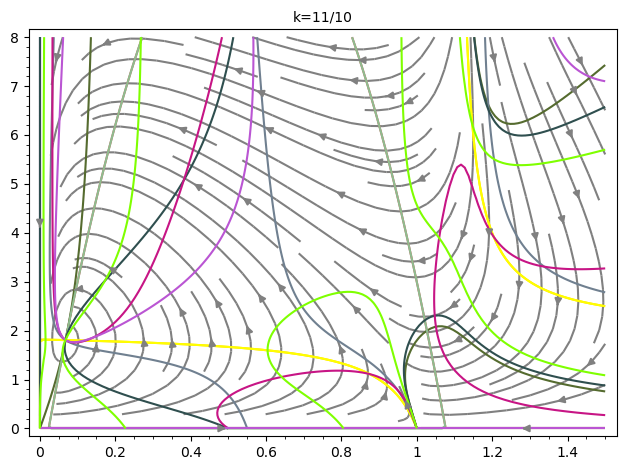

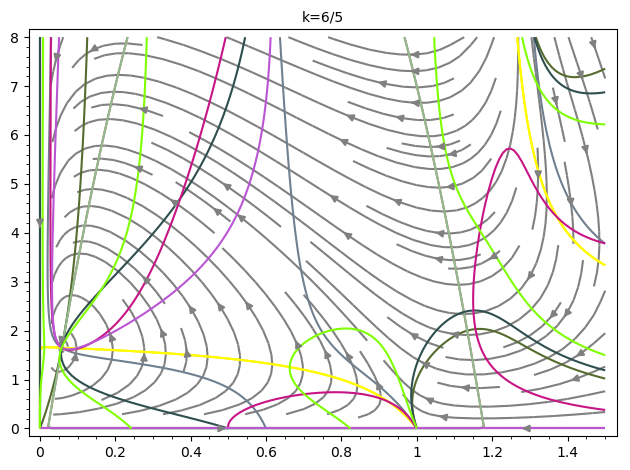

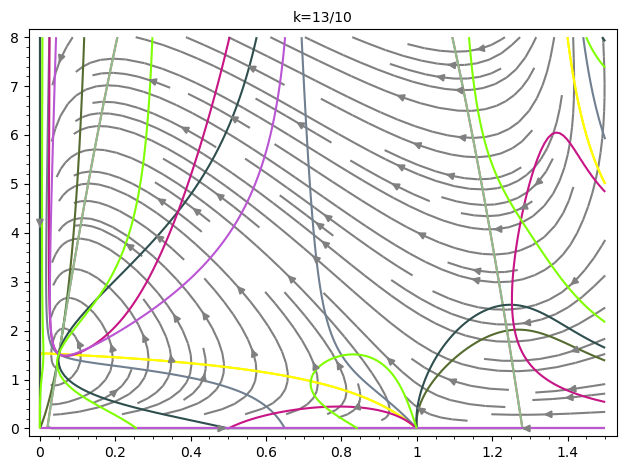

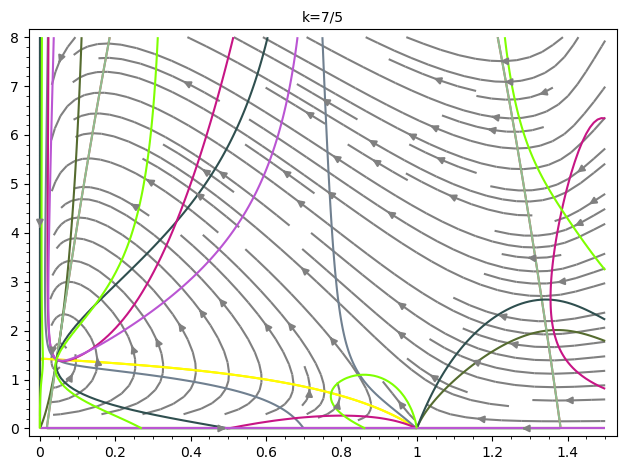

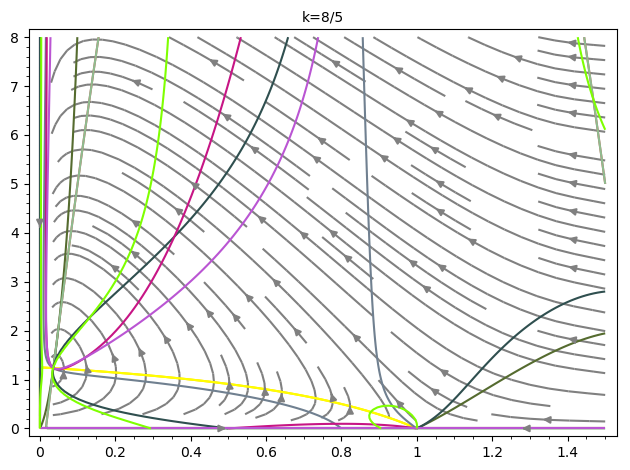

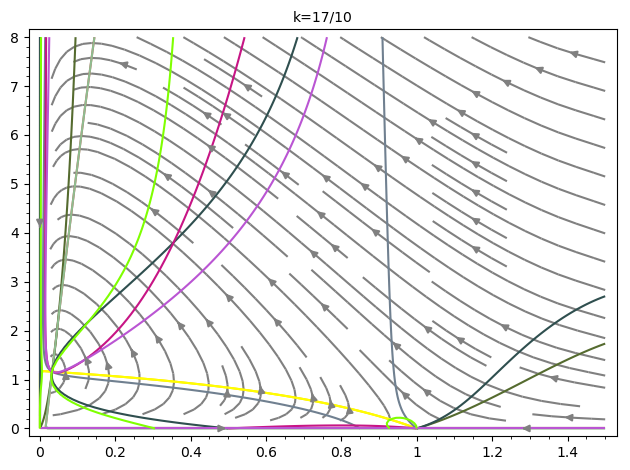

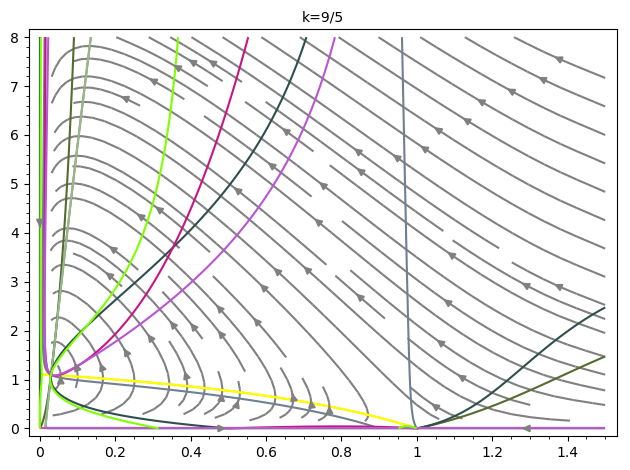

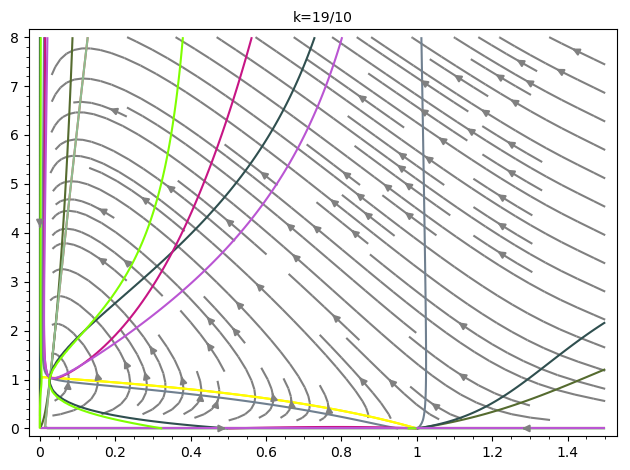

In [111]:
f0s = factsx + factsy
f1s = [lie(vf, g) for g in f0s]
f2s = [lie(vf, g) for g in f1s]
f3s = [lie(vf, g) for g in f2s]
fs = f0s + f1s + f2s
for n in range(0,21):
    k0 = QQ(n)/QQ(10)
    p = []
    p.append(streamline_plot(tuple(map(SR,vf.subs(k=k0))),
                             (x,0,1.5), (y,0,8), color="grey",
                             title="k={}".format(k0)))
    for col,l in zip(colors, fs):
        c = SR(l.subs(k=k0)) == 0
        p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                               aspect_ratio='automatic',color=col))
    show(sum(p))

In [112]:
var('t')
function("xv yv")
ODE = [diff(xv(t),t) == SR(vf[0].subs(k=k0)).subs(x=xv(t), y=yv(t)),
       diff(yv(t),t) == SR(vf[1].subs(k=k0)).subs(x=xv(t), y=yv(t))]
ODE

[diff(xv(t), t) == 3/10*xv(t)^2*yv(t) - 3/5*xv(t)^2 - 3/5*xv(t)*yv(t) + 3/5*xv(t),
 diff(yv(t), t) == -2*xv(t)^2*yv(t) + 4*xv(t)*yv(t) - 1/20*yv(t)^2 - 1/20*yv(t)]

In [113]:
#sln = desolve_system_rk4(ODE, [xv(t),yv(t)], [0, 0.2, 1]); sln

In [114]:
k0 = QQ(0.8)
vf0 = vf.subs(k=k0); vf0

(3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y)

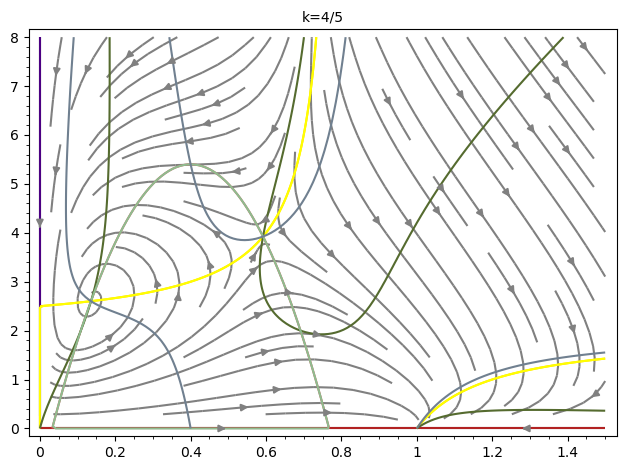

In [115]:
f0s = factsx + factsy
f1s = [lie(vf, g) for g in f0s]
f2s = [lie(vf, g) for g in f1s]
f3s = [lie(vf, g) for g in f2s]
fs = f0s + f1s
p = []
p.append(streamline_plot(tuple(map(SR,vf.subs(k=k0))),
                         (x,0,1.5), (y,0,8), color="grey",
                         title="k={}".format(k0)))
for col,l in zip(colors, fs):
    c = SR(l.subs(k=k0)) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color=col))
show(sum(p))
#plot((sln[0].rhs(),sln[1].rhs()))

### Polynomial abstraction plus grid

In [12]:
R.<x,y> = QQ[]
us = [x,y]
k=QQ(0.8); b=QQ(0.6); c=QQ(0.3); e=QQ(0.05); f=QQ(2)
vf = vector([b*x*(QQ(1)-x) - c*x*(k-x)*y,
            -e*y*(QQ(1)+y)+f*x*(k-x)*y])
v0 = [2.0, 1.0]

In [13]:
factsx,factsy = [[a for a,_ in v.factor() if a.variables()] for v in vf]
factsx,factsy

([x, 5*x*y - 10*x - 4*y + 10], [y, 40*x^2 - 32*x + y + 1])

In [14]:
f0s = factsx + factsy
f1s = [lie(vf, g) for g in f0s]
f2s = [lie(vf, g) for g in f1s]
f3s = [lie(vf, g) for g in f2s]

In [15]:
f1s

[3/10*x^2*y - 3/5*x^2 - 6/25*x*y + 3/5*x,
 -10*x^3*y + 3/2*x^2*y^2 + 10*x^2*y - 29/20*x*y^2 + 6*x^2 - 5/4*x*y + 1/5*y^2 - 6*x + 1/5*y,
 -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y,
 24*x^3*y - 48*x^3 - 154/5*x^2*y + 336/5*x^2 + 232/25*x*y - 1/20*y^2 - 96/5*x - 1/20*y]

In [16]:
f2s

[-3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x,
 20*x^5*y - 15*x^4*y^2 + 9/10*x^3*y^3 - 18*x^4*y + 45/2*x^3*y^2 - 261/200*x^2*y^3 - 37/5*x^3*y - 1719/200*x^2*y^2 + 493/1000*x*y^3 - 36/5*x^3 + 517/100*x^2*y + 111/400*x*y^2 - 1/50*y^3 + 54/5*x^2 + 429/400*x*y - 3/100*y^2 - 18/5*x - 1/100*y,
 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y,
 -48*x^5*y + 108/5*x^4*y^2 + 68/5*x^4*y - 924/25*x^3*y^2 + 432/5*x^4 + 86*x^3*y + 4827/250*x^2*y^2 - 4176/25*x^3 - 8007/125*x^2*y - 1782/625*x*y^2 + 1/200*y^3 + 2304/25*x^2 + 1204/125*x*y + 3/400*y^2 - 288/25*x + 1/400*y]

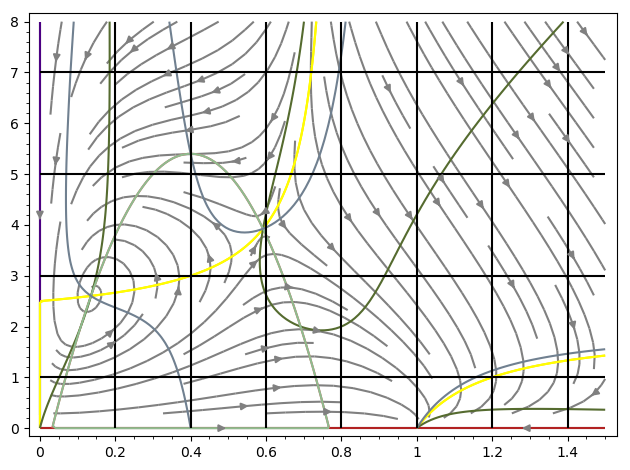

In [119]:
fs = f0s + f1s
p = []
p.append(streamline_plot(tuple(map(SR,vf)),
                         (x,0,1.5), (y,0,8), color="grey"))
# Plot polys
for col,l in zip(colors, fs):
    c = SR(l) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color=col))
# Plot grid
for s in range(1,8,2):
    c = SR(y) - SR(s) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color="black"))
for s in range(1,15,1):
    c = SR(x) - SR(s)/5 == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color="black"))
show(sum(p))

In [120]:
len(fs)

8

In [121]:
3**len(fs)

6561

In [122]:
fs = f0s + f1s + f2s
p = []
p.append(streamline_plot(tuple(map(SR,vf)),
                         (x,0,1.5), (y,0,8), color="grey"))
# Plot polys
for col,l in zip(colors, fs):
    c = SR(l) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color=col))
# Plot grid
for s in range(1,8,2):
    c = SR(y) - SR(s) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color="black"))
for s in range(1,15,1):
    c = SR(x) - SR(s)/5 == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color="black"))
p.append(text("R1", (1.3,6), fontsize="24",fontweight="bold"))
show(sum(p))

A rather large number of polynomials!

In [123]:
len(fs)

12

In [124]:
3**len(fs)

531441

However, we find only 3 intersect R1

In [127]:
R1 = [('GT', x - QQ(1.2)), ('LT', x - QQ(1.4)), ('LT', y - QQ(7)), ('GT', y - QQ(5))]; R1

[('GT', x - 6/5), ('LT', x - 7/5), ('LT', y - 7), ('GT', y - 5)]

In [128]:
R1fs = [f for f in fs if qepcad(qf.exists([x,y], from_cnf([R1 + [('EQ', f)]]))) == 'TRUE']; R1fs

[-10*x^3*y + 3/2*x^2*y^2 + 10*x^2*y - 29/20*x*y^2 + 6*x^2 - 5/4*x*y + 1/5*y^2 - 6*x + 1/5*y,
 -3/5*x^4*y + 9/50*x^3*y^2 + 6/25*x^3*y - 231/1000*x^2*y^2 + 18/25*x^3 + 573/1000*x^2*y + 87/1250*x*y^2 - 27/25*x^2 - 69/250*x*y + 9/25*x,
 4*x^4*y - 6/5*x^3*y^2 - 4*x^3*y + 87/50*x^2*y^2 - 3/5*x^2*y - 78/125*x*y^2 + 1/200*y^3 + 4/5*x*y + 3/400*y^2 + 1/400*y]

How about a general grid square?

In [16]:
import signal
from subprocess import call

class TimeoutError(Exception):
    pass

class timeout:
    def __init__(self, seconds=1, error_message='Timeout'):
        self.seconds = seconds
        self.error_message = error_message
    def handle_timeout(self, signum, frame):
        raise TimeoutError(self.error_message)
    def __enter__(self):
        signal.signal(signal.SIGALRM, self.handle_timeout)
        signal.alarm(self.seconds)
    def __exit__(self, type, value, traceback):
        signal.alarm(0)

fs = f0s + f1s
p = []
p.append(streamline_plot(tuple(map(SR,vf)),
                         (x,0,1.5), (y,0,8), color="grey"))
# Plot polys
for col,l in zip(colors, fs):
    c = SR(l) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color=col))
# Plot grid
for n in range(1,8,2):
    y1 = QQ(n)
    y0 = y1 - 2
    p.append(implicit_plot(SR(y) - SR(y1) == 0, (x,0,1.5), (y,0,8),
                               aspect_ratio='automatic',color="black"))
    for m in range(1,8,1):
        x1 = QQ(m)/5
        x0 = x1 - QQ(1)/5
        try:
            with timeout(1):
                R = [('GT', x - x0), ('LT', x - x1), ('GT', y - y0), ('LT', y - y1)]
                Rfs = [f for f in fs if qepcad(qf.exists([x,y], from_cnf([R + [('EQ', f)]]))) == 'TRUE']
                print "{}, {}: {}".format(x0, y0, str(Rfs))
                p.append(text("{}".format(len(Rfs)), ((x1 + x0)/2,(y1 + y0)/2), fontsize="10",fontweight="bold"))
        except TimeoutError:
            print "timeout on {}, {}".format(x0,y0)
            p.append(text("?", ((x1 + x0)/2,(y1 + y0)/2), fontsize="10",fontweight="bold"))
for m in range(1,15,1):
    x0 = QQ(m)/5
    x1 = x0 + QQ(1)/5 
    p.append(implicit_plot(SR(x) - SR(x0) == 0, (x,0,1.5), (y,0,8),
                   aspect_ratio='automatic',color="black"))
show(sum(p))

Smaller grid

In [ ]:
fs = f0s + f1s
p = []
p.append(streamline_plot(tuple(map(SR,vf)),
                         (x,0,1.5), (y,0,8), color="grey"))
# Plot polys
for col,l in zip(colors, fs):
    c = SR(l) == 0
    p.append(implicit_plot(c, (x,0,1.5), (y,0,8),
                           aspect_ratio='automatic',color=col))
dy = QQ(1)
dx = QQ(1)/10
# Plot grid
for n in range(1,8,1):
    y1 = QQ(n)
    y0 = y1 - dy
    p.append(implicit_plot(SR(y) - SR(y1) == 0, (x,0,1.5), (y,0,8),
                               aspect_ratio='automatic',color="black"))
    for m in range(1,15,1):
        x1 = QQ(m)/10
        x0 = x1 - dx
        R = [('GT', x - x0), ('LT', x - x1), ('GT', y - y0), ('LT', y - y1)]
        Rfs = []
        fail = False
        for f in fs:
            started = False
            try:
                print "starting qepcad!"
                with timeout(1):
                    qc = qepcad(qf.exists([x,y], from_cnf([R + [('EQ', f)]])), interact=True)
                    started=True
            except TimeoutError:
                print "failed to start qepcad -- retrying"
                try:
                    with timeout(1):
                        qc = qepcad(qf.exists([x,y], from_cnf([R + [('EQ', f)]])), interact=True)
                        started = True
                except:
                    print "double fail to start qepcad"
                    fail = True
            if started:
                try:
                    with timeout(1):
                        qc.go()
                        qc.go()
                        qc.go()
                        ans = qc.finish()
                        if ans == 'TRUE':
                            Rfs += [f]
                        print "checked intersect"
                except TimeoutError:
                    fail = True
                    print "timeout on {}, {}: {}".format(x0,y0, f)
                    p.append(text("?", ((x1 + x0)/2,(y1 + y0)/2), fontsize="10",fontweight="bold"))
                finally:
                    qc.quit()
                    try:
                        call(["killall", "-9", "qepcad"])
                    except:
                        pass
        print "finished intersection check"
        print "{}, {}: {}".format(x0, y0, str(Rfs))
        p.append(text("{}{}".format('>= ' if fail else '', len(Rfs)), ((x1 + x0)/2,(y1 + y0)/2), fontsize="10",fontweight="bold"))
for m in range(1,15,1):
    x0 = QQ(m)/10
    x1 = x0 + dx 
    p.append(implicit_plot(SR(x) - SR(x0) == 0, (x,0,1.5), (y,0,8),
                   aspect_ratio='automatic',color="black"))
show(sum(p))

starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
finished intersection check
0, 0: [40*x^2 - 32*x + y + 1, -10*x^3*y + 3/2*x^2*y^2 + 10*x^2*y - 29/20*x*y^2 + 6*x^2 - 5/4*x*y + 1/5*y^2 - 6*x + 1/5*y, -2*x^2*y + 8/5*x*y - 1/20*y^2 - 1/20*y]
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
finished intersection check
1/10, 0: []
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
starting qepcad!
checked intersect
